In [43]:
### Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno # To get visual representation of missing values

import math
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

import sklearn.compose 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore') # To ignore the warnings

In [44]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Data description

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

### Download dataset

In [45]:
heart_failure = pd.read_csv('../../data/interim/heart_failure_clinical_records_dataset.csv')
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [46]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [47]:
cols =[
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time"
];

heart_failure[cols].corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


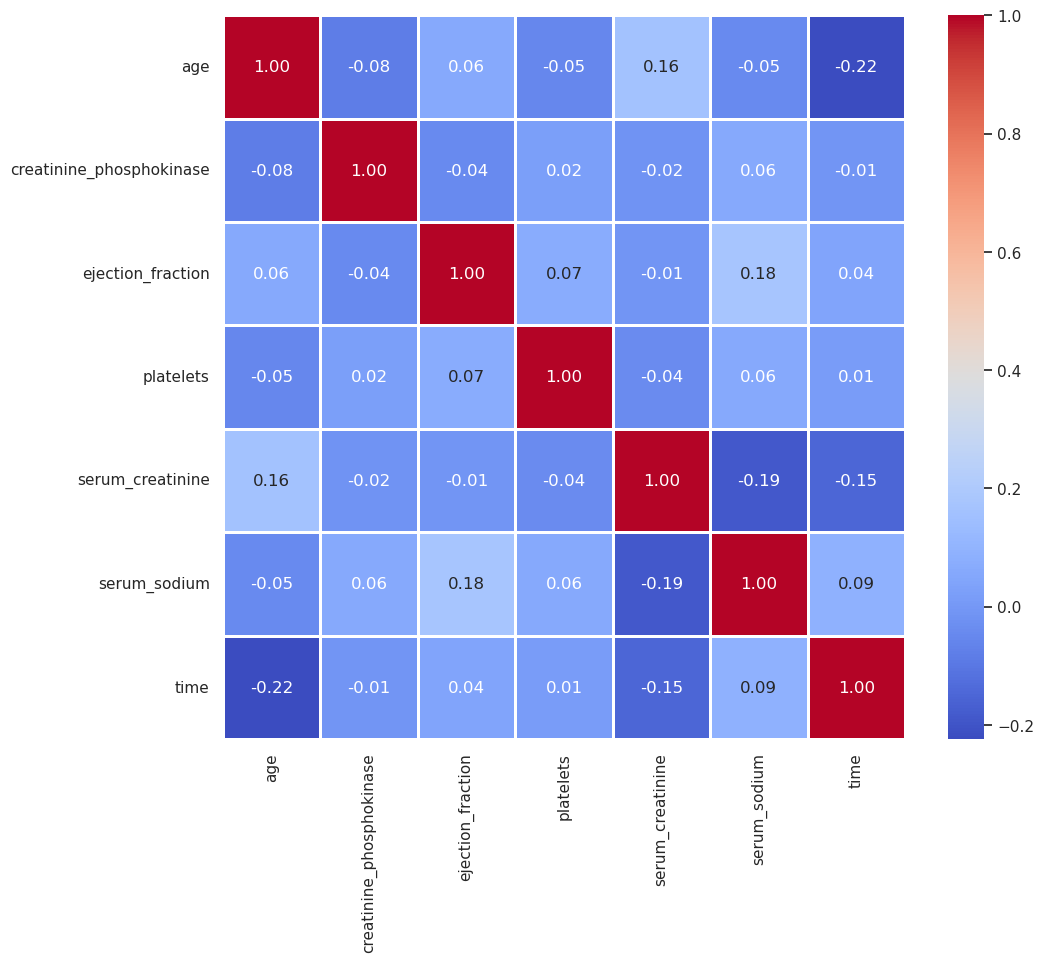

In [48]:
sns.heatmap(
    heart_failure[cols].corr(),
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=2
);

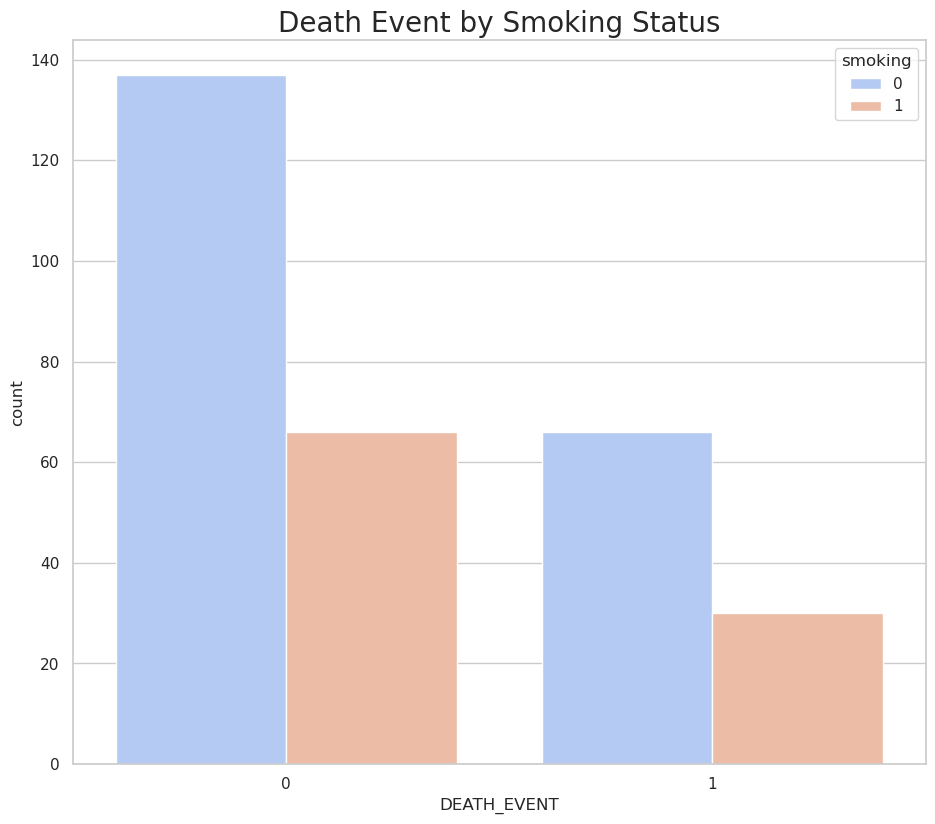

In [49]:
sns.countplot(
    data=heart_failure,
    x='DEATH_EVENT',
    hue='smoking',
    palette='coolwarm'
);
plt.title('Death Event by Smoking Status', fontsize=20);

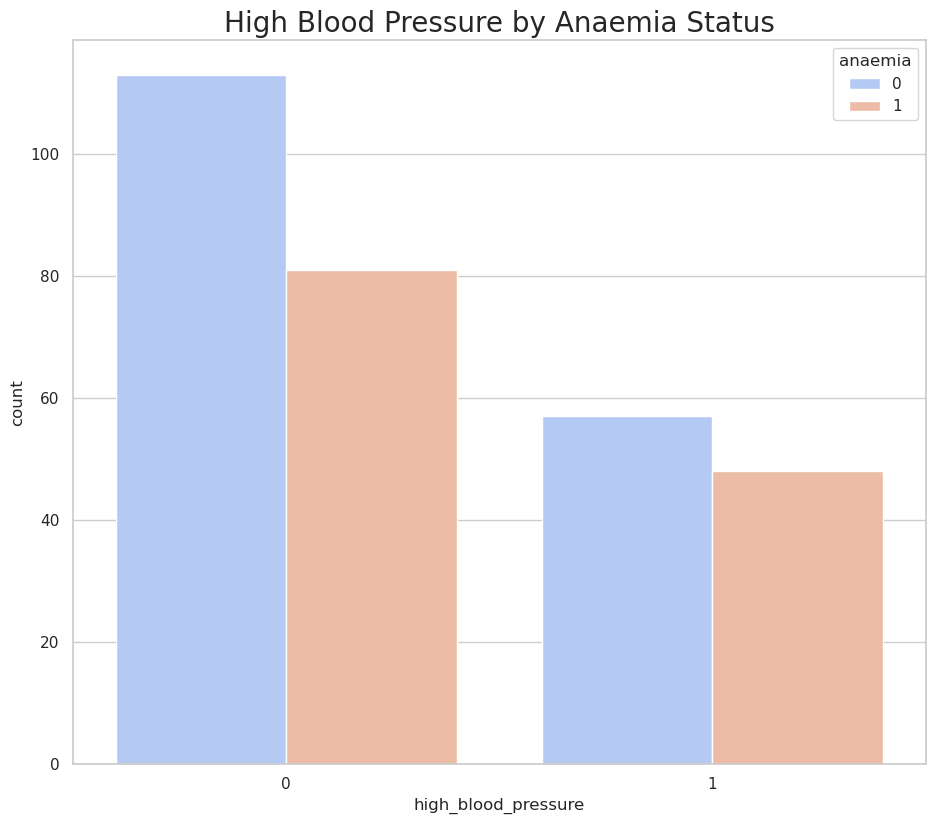

In [50]:
sns.countplot(
    data=heart_failure,
    x='high_blood_pressure',
    hue='anaemia',
    palette='coolwarm'
);

plt.title('High Blood Pressure by Anaemia Status', fontsize=20);

In [51]:
heart_failure.groupby('DEATH_EVENT')['age'].mean()

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

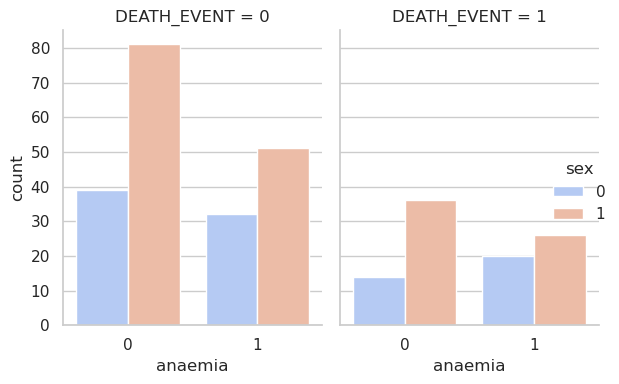

In [52]:
sns.catplot(
    data=heart_failure,
    x='anaemia',
    hue='sex',
    col='DEATH_EVENT',
    kind='count',
    palette='coolwarm',
    height=4,
    aspect=0.7
)

#plt.title('Death Event by Anaemia and Sex', fontsize=20);
plt.tight_layout();

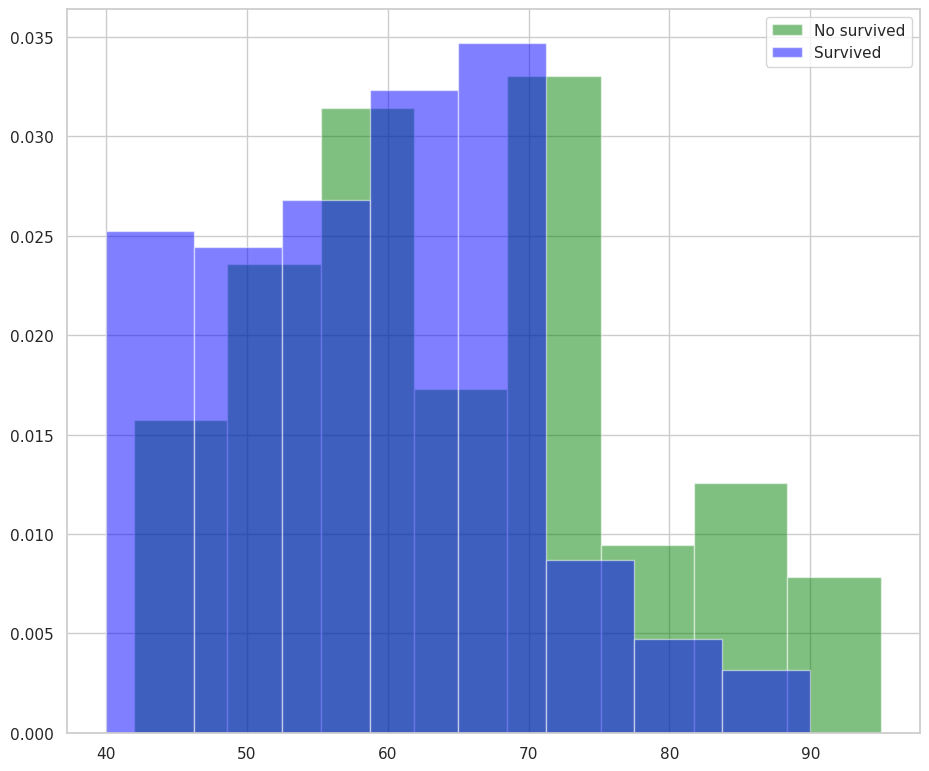

In [53]:
x1 = heart_failure.age[heart_failure.DEATH_EVENT == 1]
x2 = heart_failure.age[heart_failure.DEATH_EVENT == 0]

kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)

plt.hist(x1, **kwargs, color='g', label='No survived')
plt.hist(x2, **kwargs, color='b', label='Survived')
plt.legend();

### Split data in train and test

In [54]:
X_input = heart_failure.drop('DEATH_EVENT', axis=1)
y_target = heart_failure.DEATH_EVENT


X_train, X_test, y_train, y_test = train_test_split(
    X_input, 
    y_target, 
    test_size=0.3, 
    random_state=0
)

In [56]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)

model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_pred = model_lr.predict(X_test)

accuracy_train = model_lr.score(X_train, y_train)
accuracy_test = model_lr.score(X_test, y_test)

print(f'Train Accuracy: {accuracy_train}')
print(f'Test Accuracy: {accuracy_test}')

Train Accuracy: 0.84688995215311
Test Accuracy: 0.7888888888888889


In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr, X_input, y_target, cv=5).mean()

print(f'Cross Validation Score: {scores}')


Cross Validation Score: 0.7822598870056497
